# Case Study on Probability for Data Science

> ***Problem Statement:***
* To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)Also, if some data pre-processing is necessary do that as well.

In [1]:
# Importing Pandas Library as 'pd'
import pandas as pd
# Importing NumPy Library as 'np'
import numpy as np
# Importing Matplot's Sub Library PyPlot as 'plt'
import matplotlib.pyplot as plt
# Importing seaborn Library as 'sns'
import seaborn as sns

#### 1. Read the dataset to the python environment.

In [2]:
# Getting data from Local CSV File and copying into data_df Datafram
data_df=pd.read_csv('mushrooms.csv')
# Getting data of dataframe data_df
data_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


> ***Attribute Information:***
*  ***cap-shape:*** bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
*  ***cap-surface:*** fibrous=f, grooves=g, scaly=y, smooth=s
*  ***cap-colour:*** brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
*  ***bruises:*** bruises=t, no=f
*  ***odour:*** almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
*  ***gill-attachment:*** attached=a, descending=d, free=f, notched=n
*  ***gill-spacing:*** close=c, crowded=w, distant=d
*  ***gill-size:*** broad=b, narrow=n
*  ***gill-colour:*** black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
*  ***stalk-shape:*** enlarging=e, tapering=t
*  ***Stalk-root:*** bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
*  ***stalk-surface-above-ring:*** fibrous=f, scaly=y, silky=k, smooth=s
*  ***stalk-surface-below-ring:*** fibrous=f, scaly=y, silky=k, smooth=s
*  ***stalk-colour-above-ring:*** brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
*  ***stalk-colour-below-ring:*** brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
*  ***veil-type:*** partial=p, universal=u
*  ***veil-colour:*** brown=n, orange=o, white=w, yellow=y
*  ***ring-number:*** none=n, one=o, two=t
*  ***ring-type:*** cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
*  ***spore-print-colour:*** black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
*  ***population:*** abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
*  ***habitat:*** grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d
    

##### Check for the null values present in the dataset

In [3]:
#To knowing the sum of null value is pandas dataframe
data_df.isnull().sum().to_frame('Null value count')

,Null value count
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


> ***Insights:-***
    * No null values found.

In [4]:
# To know the shape of the dataset
data_df.shape

(8124, 23)

> ***Insights:-***
   * Here ***8124 records and 23*** features available in the dataset.

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
data_df['class'].unique()

array(['p', 'e'], dtype=object)

##### Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data_df.columns:
    data_df[column] = labelencoder.fit_transform(data_df[column])

In [12]:
data_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


#### From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so I remove it.

In [16]:
data_df=data_df.drop(["veil-type"],axis=1)

##### Data Analysis

C:\Users\chinchu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


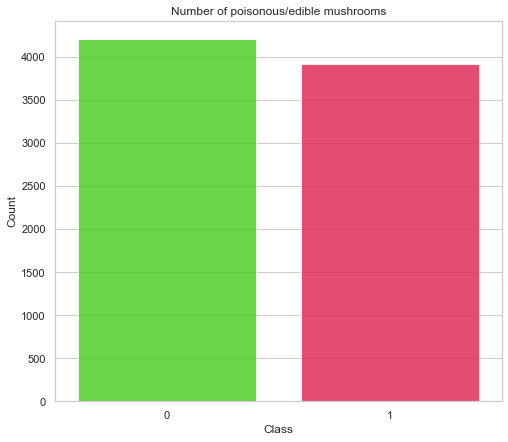

In [17]:
count = data_df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

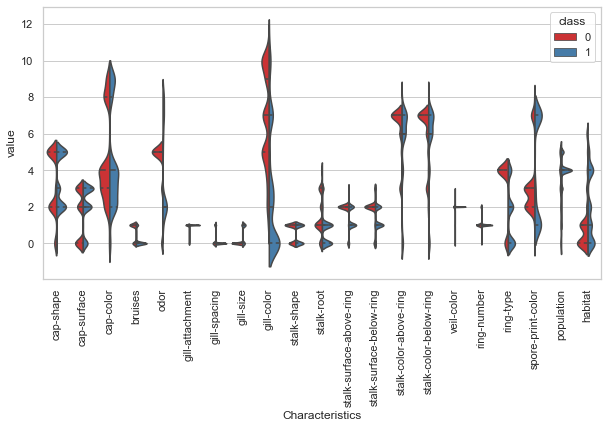

In [18]:
df_div = pd.melt(data_df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = data_df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

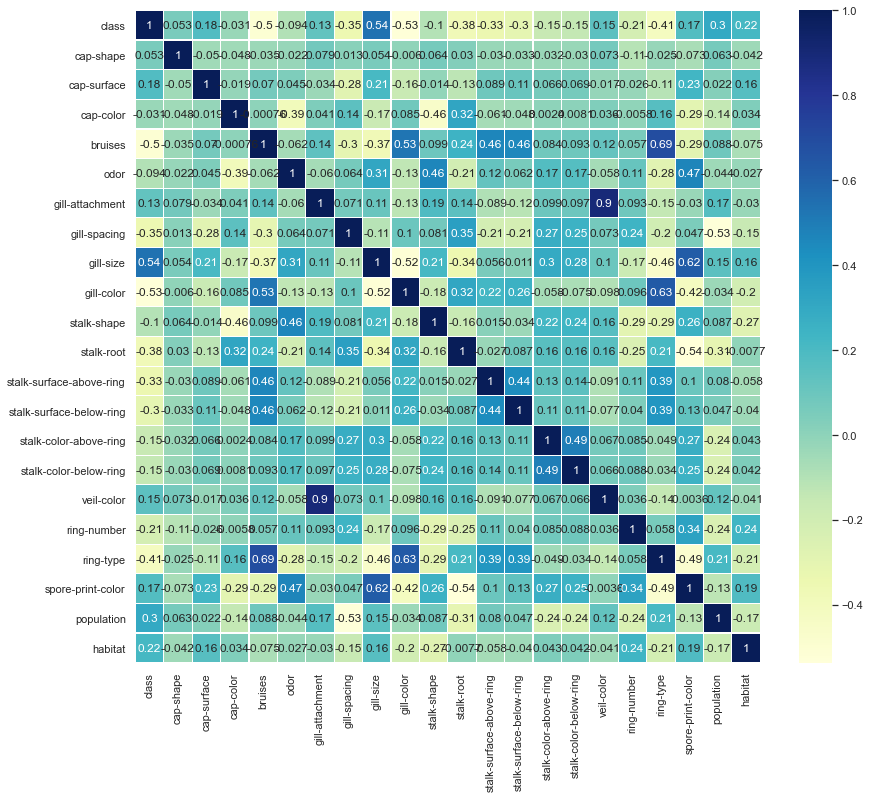

In [19]:
plt.figure(figsize=(14,12))
sns.heatmap(data_df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

> ***Insights:-***
* Usually the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely.

In [20]:
data_df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


C:\Users\chinchu\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\chinchu\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\chinchu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


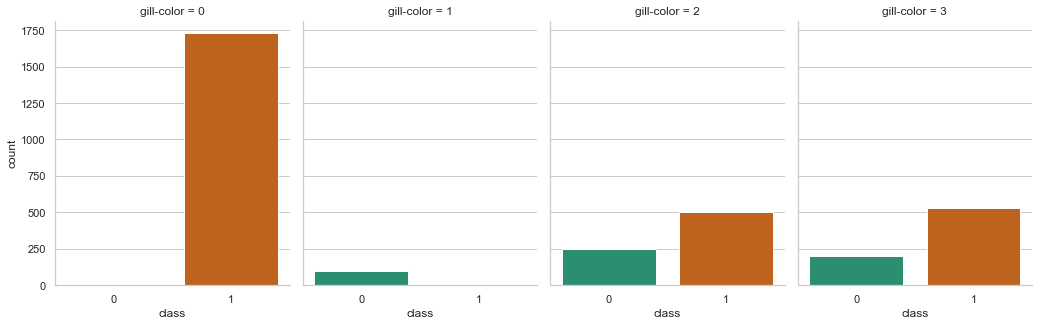

In [21]:
new_var = data_df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor1.png", format='png', dpi=500, bbox_inches='tight')

C:\Users\chinchu\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\chinchu\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\chinchu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


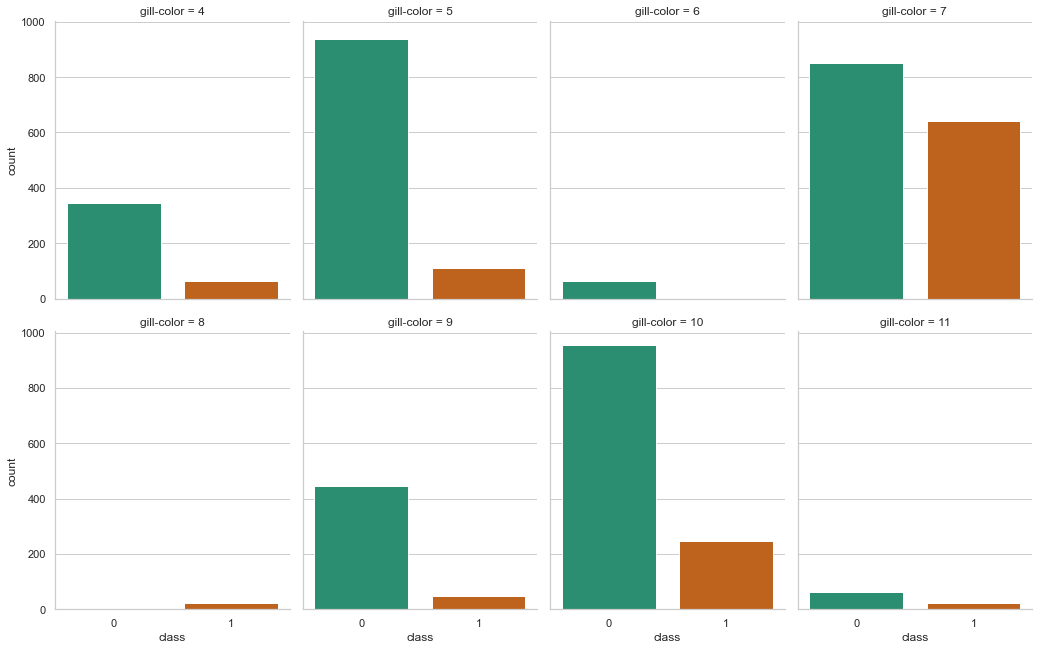

In [22]:
new_var=data_df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor2.png", format='png', dpi=400, bbox_inches='tight')

#### Defining features and target variable x and y

In [25]:
X=data_df.drop(['class'], axis=1)
y=data_df['class']

#### Feature can split into test and train data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

#### Classification models:

#### Gaussian Naive Bayes (GaussianNB)

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, y_train)
y_pred_GNB=clf_GNB.predict(X_test)
cfm=confusion_matrix(y_test, y_pred_GNB)

Text(0.5, 12.5, 'Predicted label')

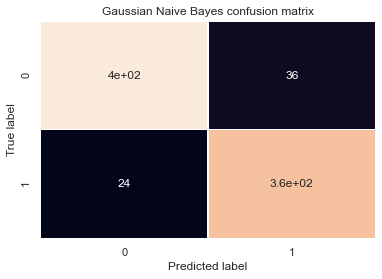

In [30]:
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Gaussian Naive Bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [33]:
print("Test data- Gaussian Naive Bayes report \n", classification_report(y_test, y_pred_GNB))
print("Test Accuracy: {}%".format(round(clf_GNB.score(X_test, y_test)*100, 2)))

Test data- Gaussian Naive Bayes report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       433
           1       0.91      0.94      0.92       380

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813

Test Accuracy: 92.62%


### Decision Tree Classification

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
cfm1=confusion_matrix(y_test, y_pred_dt)

Text(0.5, 12.5, 'Predicted label')

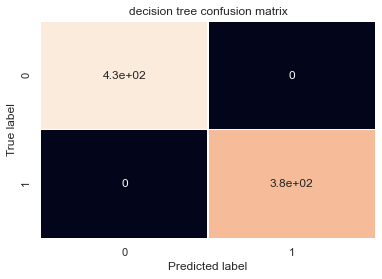

In [43]:
sns.heatmap(cfm1, annot = True,  linewidths=.5, cbar =None)
plt.title('decision tree confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [44]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


###  Logistic Regression Classification

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
cfm2=confusion_matrix(y_test, y_pred_lr)

Text(0.5, 12.5, 'Predicted label')

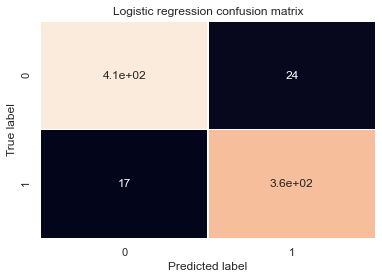

In [57]:
sns.heatmap(cfm2, annot = True,  linewidths=.5, cbar =None)
plt.title('Logistic regression confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [58]:
y_pred_lr = lr.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_lr))
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813

Test Accuracy: 94.96%


### KNN Classification

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
cfm3=confusion_matrix(y_test, y_pred_knn)

Text(0.5, 12.5, 'Predicted label')

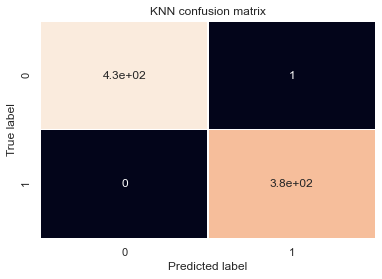

In [63]:
sns.heatmap(cfm3, annot = True,  linewidths=.5, cbar =None)
plt.title('KNN confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [64]:
y_pred_knn = knn.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_knn))
print("Test Accuracy: {}%".format(round(knn.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 99.88%


### Random Forest Classification

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
cfm4=confusion_matrix(y_test, y_pred_rf)

Text(0.5, 12.5, 'Predicted label')

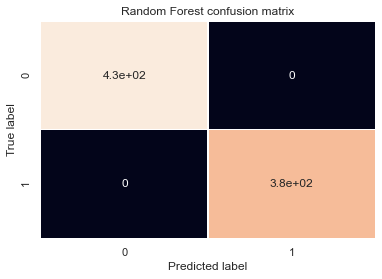

In [66]:
sns.heatmap(cfm4, annot = True,  linewidths=.5, cbar =None)
plt.title('Random Forest confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [67]:
y_pred_rf = rf.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_rf))
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


 ### SVM Classification

In [68]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
y_pred_svm=rf.predict(X_test)
cfm5=confusion_matrix(y_test, y_pred_svm)

Text(0.5, 12.5, 'Predicted label')

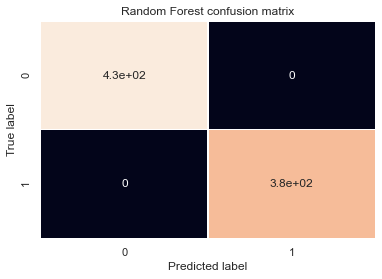

In [69]:
sns.heatmap(cfm5, annot = True,  linewidths=.5, cbar =None)
plt.title('Random Forest confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [70]:
y_pred_svm = svm.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_svm))
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


> ***Insights:-***
* From the confusion matrix, we saw that our train and test data is balanced.
* Most of the classification methods hit 100% accuracy with this dataset.